In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
import math

import os
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [2]:
print(torch.__version__)

1.10.2+cpu


In [3]:
# make sine waves
class Sines():
    def __init__(self):
        self.data = []
        self.x = np.arange(0, 10, 0.25) # 40 points
        self.num_data = 100
    
    def sampleFunction(self):
        print("this is sample function")
        
    def makeWave(self, amplitude=1, frequency=1, phase=0, vertical_shift=0):
        wave = amplitude * np.sin(frequency * (self.x + phase)) + vertical_shift
        return wave
    
    def makeDataset(self):
        dataset = np.zeros((self.num_data, len(self.x)))
        for idx in range(self.num_data):
            amp = 0.8 + np.abs(np.random.randn())
            freq = 1.3 + 0.3 * np.random.randn()
            ph = np.pi/2 * np.random.randn()
            vs = np.random.randn()
            dataset[idx, :] = self.makeWave(amplitude=amp, frequency=freq, phase=ph, vertical_shift=vs)
        dataset = torch.from_numpy(dataset)
        return dataset

In [5]:
inst = Sines()
Data = inst.makeDataset()

In [16]:
Data.type()

'torch.DoubleTensor'

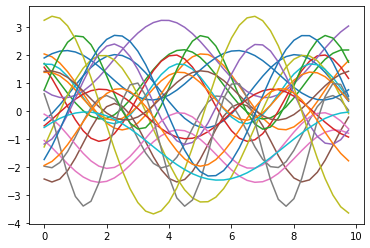

In [14]:
for idx in range(inst.num_data):
    plt.plot(inst.x, Data[idx,:])
    if idx > 20:
        break

In [6]:
# Configure data loader
os.makedirs("data/mnist", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "data/mnist",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(28), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=64,
    shuffle=True,
)

In [7]:
cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

for i, (imgs, _) in enumerate(dataloader):
    real_imgs = Variable(imgs.type(Tensor))
    
    if i == 2:
        break


In [8]:
imgs.type()

'torch.FloatTensor'

In [9]:
real_imgs.type()

'torch.FloatTensor'

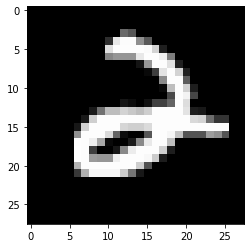

In [10]:
plt.imshow(real_imgs[0,0,:,:], cmap='gray')
plt.show()

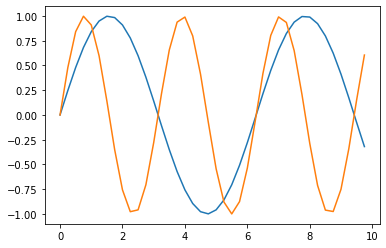

In [11]:
# make sine waves
x = np.arange(0,10,0.25)
y = np.sin(x)
z = np.sin(2*x)
plt.plot(x,y)
plt.plot(x,z)

In [12]:
x

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

In [13]:
# wavelength = 2*np.pi 
# frequency = 

In [1]:
from torch.utils.data import Dataset, DataLoader

In [25]:
import matplotlib.pyplot as plt
import numpy as np

b = 59
g = 3.7
n = np.linspace(1,18,18)
ability = b + g * (n - 1) * (0.7025 + 0.0175 * (n - 1))
linear = b + g * (n - 1)


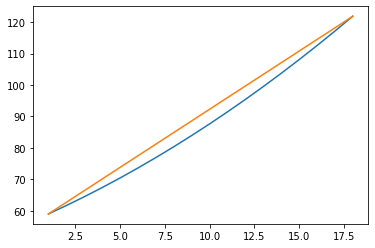

In [26]:
plt.plot(n, ability)
plt.plot(n, linear)

In [21]:
ability

array([ 59.    ,  61.664 ,  64.4575,  67.3805,  70.433 ,  73.615 ,
        76.9265,  80.3675,  83.938 ,  87.638 ,  91.4675,  95.4265,
        99.515 , 103.733 , 108.0805, 112.5575, 117.164 , 121.9   ])